In [236]:
import csv
import os
import numpy as np
import librosa
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import tensorflow as tf
import matplotlib.pyplot as plt
from pywt import wavedec

In [237]:
csv_uri = '../Preprocessing/db1/data_mfccRMScqtdb1L4.csv'
data = pd.read_csv(csv_uri)
data.head()


,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/DWT/MR/New_MR_013.wav,13.275029,-114.075073,-39.266071,-25.314356,7.192240,1.450101,-1.516977,6.799383,3.593220,...,0.042602,0.052787,0.081093,0.071576,0.078831,0.078455,0.041210,0.052957,0.054962,MR
1,../data/DWT/MR/New_MR_174.wav,2.735958,-101.759621,1.613044,15.661122,-4.250453,-2.219740,-3.636328,3.370321,2.589071,...,0.040496,0.035664,0.050240,0.051797,0.025054,0.005805,0.016734,0.030930,0.043366,MR
2,../data/DWT/MR/New_MR_182.wav,6.833334,-86.496849,6.688435,17.787397,-5.072179,-7.556493,3.200465,5.778526,1.163917,...,0.031924,0.033961,0.031501,0.024131,0.027847,0.051073,0.035546,0.054646,0.074654,MR
3,../data/DWT/MR/New_MR_005.wav,12.283415,-101.057259,-71.326782,-10.088476,-1.508538,-5.740779,-9.648901,0.486753,-5.738785,...,0.027965,0.038639,0.044320,0.022866,0.035629,0.068774,0.069476,0.064543,0.084222,MR
4,../data/DWT/MR/New_MR_067.wav,8.955171,-91.488037,2.838894,12.284600,-5.802187,-3.077615,-7.189522,2.224749,3.770444,...,0.043225,0.030217,0.039122,0.052725,0.022261,0.012779,0.006573,0.018640,0.022388,MR


In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 103 entries, filename to label
dtypes: float64(101), object(2)
memory usage: 804.8+ KB


In [239]:
# scaler = StandardScaler()
X = data.drop(['label', 'filename'], axis=1)
# X = scaler.fit_transform(X)
# X = np.reshape(X, (-1, X.shape[0], X.shape[1], 1))
y = data.iloc[:, -1]

In [240]:
X.shape

(1000, 101)

In [241]:
y.head()

0    MR
1    MR
2    MR
3    MR
4    MR
Name: label, dtype: object

In [242]:
X

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
0,13.275029,-114.075073,-39.266071,-25.314356,7.192240,1.450101,-1.516977,6.799383,3.593220,-0.832282,...,0.012993,0.042602,0.052787,0.081093,0.071576,0.078831,0.078455,0.041210,0.052957,0.054962
1,2.735958,-101.759621,1.613044,15.661122,-4.250453,-2.219740,-3.636328,3.370321,2.589071,9.271870,...,0.037926,0.040496,0.035664,0.050240,0.051797,0.025054,0.005805,0.016734,0.030930,0.043366
2,6.833334,-86.496849,6.688435,17.787397,-5.072179,-7.556493,3.200465,5.778526,1.163917,6.903099,...,0.026833,0.031924,0.033961,0.031501,0.024131,0.027847,0.051073,0.035546,0.054646,0.074654
3,12.283415,-101.057259,-71.326782,-10.088476,-1.508538,-5.740779,-9.648901,0.486753,-5.738785,-6.233697,...,0.026140,0.027965,0.038639,0.044320,0.022866,0.035629,0.068774,0.069476,0.064543,0.084222
4,8.955171,-91.488037,2.838894,12.284600,-5.802187,-3.077615,-7.189522,2.224749,3.770444,11.581161,...,0.038105,0.043225,0.030217,0.039122,0.052725,0.022261,0.012779,0.006573,0.018640,0.022388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,13.946439,-72.456337,27.883200,4.597654,-10.793471,-6.924234,7.066338,6.512074,-2.568102,4.031226,...,0.033004,0.026511,0.022447,0.019153,0.020596,0.022355,0.031620,0.029261,0.041370,0.039670
996,36.540241,-50.625977,26.898087,1.833106,-13.597599,3.747977,0.232428,-0.522702,3.093309,-3.464850,...,0.123949,0.141367,0.115571,0.139075,0.140345,0.118557,0.129535,0.147733,0.142233,0.121688
997,-105.033226,-141.432983,-12.109451,53.852772,-38.280663,4.792521,-4.244925,-15.054985,4.313054,-3.604718,...,0.007121,0.005700,0.005953,0.005115,0.004983,0.003965,0.004164,0.004356,0.005094,0.011150
998,-103.161354,-139.971558,-13.175274,61.293945,-27.515144,4.066389,-1.435036,-8.043844,4.557523,-2.965428,...,0.009799,0.006108,0.003760,0.006229,0.006077,0.006207,0.005256,0.002674,0.007195,0.010765


In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [244]:
y_test.shape

(200,)

In [245]:
X_train.shape

(800, 101)

In [246]:
X_train

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
29,-19.517950,-92.147545,8.791373,16.940248,-2.547311,-2.328971,0.625140,2.669751,-2.301737,4.356090,...,0.010745,0.016511,0.025526,0.022755,0.014013,0.019465,0.026483,0.029422,0.038114,0.045595
535,-47.811626,-63.661469,-94.765862,-3.223539,42.197853,-22.077322,-10.837352,-10.470758,4.114723,-14.321898,...,0.011136,0.011653,0.012723,0.014359,0.018600,0.029819,0.052975,0.086556,0.125601,0.157750
695,-42.934601,-122.805061,-92.031784,33.600418,7.302986,-4.024665,-0.053503,-0.184281,-0.554389,8.065105,...,0.005667,0.012237,0.017161,0.014534,0.017419,0.022835,0.021839,0.035163,0.079352,0.126064
557,-55.979019,-93.155029,-40.377720,74.444237,2.370201,-5.347111,31.953363,3.978343,-18.451017,17.292244,...,0.021140,0.023055,0.023088,0.020604,0.015054,0.011083,0.025910,0.048949,0.072483,0.089555
836,-3.986234,-67.817711,-1.740762,15.360063,6.559355,0.170794,-4.597359,-2.497851,4.115023,5.073486,...,0.049552,0.035933,0.030563,0.030800,0.036185,0.035724,0.057568,0.051139,0.055964,0.052211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,7.050806,-92.590981,10.418278,19.491652,1.040230,5.189481,-3.662208,5.308604,3.015185,7.841938,...,0.018599,0.025436,0.028806,0.030779,0.023120,0.009346,0.022049,0.029262,0.061156,0.092892
270,-9.767623,-114.091431,-75.366112,-11.328471,-4.779082,26.680450,-4.995222,-17.838814,-13.155873,-0.415778,...,0.023712,0.028682,0.056274,0.108914,0.170937,0.227379,0.303998,0.412329,0.589635,0.728509
860,-40.605373,-69.893303,-64.995758,-5.764579,53.877399,-19.987558,-17.625368,2.676770,18.261063,-2.426292,...,0.029667,0.028553,0.016085,0.015603,0.021134,0.014723,0.024106,0.040081,0.070174,0.125471
435,-42.592789,-56.236206,-80.894585,-7.649522,45.045269,-28.671152,-18.211609,-2.280199,14.843244,-17.565828,...,0.038591,0.041313,0.042905,0.044320,0.046203,0.047110,0.050285,0.057024,0.084560,0.134157


In [247]:
lb = LabelEncoder()
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
print(y_test.shape)
y_test = tf.keras.utils.to_categorical(lb.fit_transform(y_test))
y_train = tf.keras.utils.to_categorical(lb.fit_transform(y_train))
print(X_train.shape)
print(X_test.shape)



(200,)
(800, 101, 1)
(200, 101, 1)


In [248]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [249]:
# make RNN model
def build_model():
    model = models.Sequential(
        [
            layers.SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2])),
            layers.Dense(32, activation="relu"),
            layers.Dense(16, activation="relu"),
            layers.Dense(5, activation="softmax"),
        ]
    )

    return model

In [250]:
model = build_model()
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dense_30 (Dense)            (None, 16)                528       
                                                                 
 dense_31 (Dense)            (None, 8)                 136       
                                                                 
 dense_32 (Dense)            (None, 5)                 45        
                                                                 
Total params: 7,013
Trainable params: 7,013
Non-trainable params: 0
_________________________________________________________________


In [251]:
optimazer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimazer, loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50


25/25 [==============================] - 4s 102ms/step - loss: 1.5941 - acc: 0.2050 - val_loss: 1.5793 - val_acc: 0.2650
Epoch 2/50
25/25 [==============================] - 2s 97ms/step - loss: 1.5760 - acc: 0.2138 - val_loss: 1.5601 - val_acc: 0.2450
Epoch 3/50
25/25 [==============================] - 2s 78ms/step - loss: 1.5615 - acc: 0.2150 - val_loss: 1.5379 - val_acc: 0.2450
Epoch 4/50
25/25 [==============================] - 2s 69ms/step - loss: 1.5461 - acc: 0.2125 - val_loss: 1.5197 - val_acc: 0.2650
Epoch 5/50
25/25 [==============================] - 3s 120ms/step - loss: 1.5292 - acc: 0.2275 - val_loss: 1.5015 - val_acc: 0.3000
Epoch 6/50
25/25 [==============================] - 1s 59ms/step - loss: 1.5145 - acc: 0.2562 - val_loss: 1.4888 - val_acc: 0.3200
Epoch 7/50
25/25 [==============================] - 1s 41ms/step - loss: 1.4980 - acc: 0.3038 - val_loss: 1.4738 - val_acc: 0.3600
Epoch 8/50
25/25 [==============================] - 2s 94ms/step - loss: 1.4834 - acc: 0.355

7/7 [==============================] - 0s 35ms/step - loss: 1.0139 - acc: 0.6000
Accuracy on test set is: 0.6000000238418579


Text(0, 0.5, 'Accuracy')

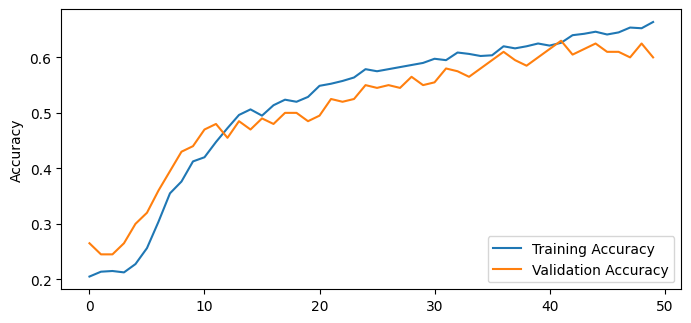

In [252]:
# evaluate model on test set
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))


# plot accuracy/error for training and validation
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')

In [253]:
model_uri = "../modelh5/model_RNN.h5"
model.save(model_uri)

In [254]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_p = np.argmax(y_pred, axis=1)
y_t = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_t, y_p)
cm

7/7 [==============================] - 0s 23ms/step


array([[29, 11,  6,  1,  1],
       [ 4, 23,  1,  0,  5],
       [ 2,  9, 23,  1,  3],
       [10, 13,  9,  9,  3],
       [ 0,  1,  0,  0, 36]])

In [255]:
# classification_report
from sklearn.metrics import classification_report

print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62        48
           1       0.40      0.70      0.51        33
           2       0.59      0.61      0.60        38
           3       0.82      0.20      0.33        44
           4       0.75      0.97      0.85        37

    accuracy                           0.60       200
   macro avg       0.64      0.62      0.58       200
weighted avg       0.65      0.60      0.58       200



### Testing

In [256]:
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dense_30 (Dense)            (None, 16)                528       
                                                                 
 dense_31 (Dense)            (None, 8)                 136       
                                                                 
 dense_32 (Dense)            (None, 5)                 45        
                                                                 
Total params: 7,013
Trainable params: 7,013
Non-trainable params: 0
_________________________________________________________________


In [257]:
import wave
import json
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' rms'
for i in range(1, 61):
  header += f' cqt{i}'
header += ' label'
header = header.split()


def extract_mfcc(audiofile):
    file = open('test.csv', 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    y, sr = librosa.load(audiofile, mono=True, duration=3, sr=8000)
    coeffs = wavedec(y, 'db1', level=10)
    cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
    mfcc = librosa.feature.mfcc(y=cD1, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
    rms = librosa.feature.rms(y=cD1)[0]
    cqt = np.abs(librosa.cqt(y=cD1, sr=sr, n_bins=60)) 
    combined_features = np.concatenate((mfcc, rms.reshape(1, -1), cqt), axis=0)
    to_append = f'Signal'
    for e in combined_features:
        to_append += f' {np.mean(e.T, axis=0)}'
    file = open('test.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

def predict(audio):
    model = tf.keras.models.load_model(model_uri)
    extract_mfcc(audio)
    data = pd.read_csv('test.csv')
    df = data.drop(['label', 'filename'], axis=1)
    pred = model.predict(df)
    class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
    cek = np.argmax(pred[0])
    print(pred[0])
    print(cek)
    print(f'Predicted class: {class_labels[cek]}')

In [258]:
predict('../data/training/MVP/New_MVP_004.wav')

1/1 [==============================] - 0s 147ms/step
[0.12116197 0.12777083 0.54132086 0.15968902 0.0500573 ]
2
Predicted class: MS
